# Zaimportowanie i wstępne uporządkowanie danych

In [38]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib
import pandas_profiling
from scipy.stats import shapiro

In [39]:
tracks = pd.read_csv('tracks.csv', 
                    sep = ',', 
                    header = [0,1],
                    encoding = 'utf-8',
                    low_memory=False)
genres = pd.read_csv('genres.csv', 
                    sep = ',',
                    encoding = 'utf-8',
                    low_memory=False)
echonest = pd.read_csv('echonest.csv', 
                    sep = ',', 
                    header = [1,2],
                    encoding = 'utf-8',
                    low_memory=False)

Zlikwidowanie limitu wyświetlanych kolumn w celu możliwości obejrzenia całości danych:

In [40]:
pd.options.display.max_columns = None

Uporządkowanie wierszy tytułowych:

In [41]:
tracks.rename(columns = {'Unnamed: 0_level_0':''}, inplace=True)
tracks.rename(columns = {'Unnamed: 0_level_1':'track_id'}, inplace=True)
tracks = tracks.drop([0])

In [42]:
echonest.rename(columns = {'Unnamed: 0_level_0':''}, inplace=True)
echonest.rename(columns = {'Unnamed: 0_level_1':'track_id'}, inplace=True)
echonest = echonest.drop([0])

Usunięcie duplikatów:

In [43]:
tracks = tracks.drop_duplicates()
echonest = echonest.drop_duplicates()
genres = genres.drop_duplicates()

Lista gatunków o największej ilości należących do nich utworów:

In [44]:
genres.sort_values('#tracks', ascending=False).head(10)

genre_id  #tracks  parent         title  top_level
31         38    38154       0  Experimental         38
14         15    34413       0    Electronic         15
11         12    32923       0          Rock         12
162      1235    14938       0  Instrumental       1235
9          10    13845       0           Pop         10
16         17    12706       0          Folk         17
22         25     9261      12          Punk         12
0           1     8693      38   Avant-Garde         38
20         21     8389       0       Hip-Hop         21
27         32     7268      38         Noise         38

# Ilość odsłuchań jako jeden z mierników popularności utworów

Spójrzmy na histogram ilości odsłuchań utworów:

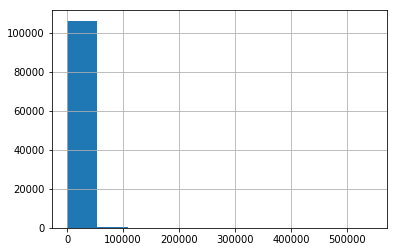

In [45]:
tracks.track.listens.hist();

Histogram jest nieczytelny z powodu obserwacji odstających.

Usunięcie utworów >0.95 kwartyla według ilości odsłuchań (usunięcie obserwacji odstających w celu stworzenia czytelnego histogramu poniżej):

In [46]:
tracks.track.sort_values('listens', ascending=False).head(10)
tracks_sorted_by_listens = tracks.track.sort_values('listens', ascending=False)
tracks_listens_cleared = tracks.track[tracks.track < tracks.track.listens.quantile(0.95)]

Histogram przedstawiający częstość obserwacji (utworów) w zależności od liczby ich odsłuchań (poniżej). Możemy dostrzec, iż zdecydowanie najwięcej jest utworów o bardzo małej ilości odsłuchań (<400), zaś wraz ze wzrostem ilości odsłuchań maleje liczba utworów. Można zatem wnioskować, iż jest wiele utworów, które zatrzymują się na bardzo niskim poziomie popularności, zaś duże ilości odsłuchań osiągane są przez bardzo mały procent całości bazy.

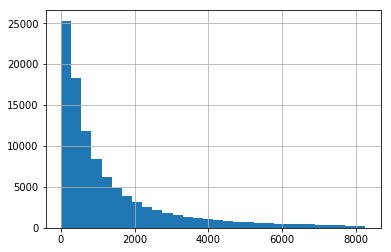

In [47]:
tracks_listens_cleared['listens'].hist(bins=30);

 Utwory o największej ilości odsłuchań (najpopularniejszy "Night Owl" odsłuchany 543252 razy):

In [48]:
tracks.track.sort_values('listens', ascending = False).head()

bit_rate  comments     composer         date_created date_recorded  \
27906  320000.0      37.0          NaN  2011-01-18 12:05:20           NaN   
54846  320000.0       4.0  Chad Crouch  2013-04-03 17:43:30           NaN   
44824  320000.0       4.0          NaN  2012-06-04 13:23:11           NaN   
15197  128000.0       7.0          NaN  2010-01-25 13:33:52           NaN   
59113  199007.0       7.0          NaN  2013-07-03 07:42:48           NaN   

       duration  favorites   genre_top          genres  \
27906     194.0     1482.0  Electronic       [15, 184]   
54846     105.0      281.0         NaN  [15, 18, 1235]   
44824     143.0      600.0         NaN    [12, 17, 66]   
15197     143.0      218.0     Hip-Hop            [21]   
59113      54.0      599.0         NaN       [18, 240]   

                     genres_all information   interest language_code  \
27906                 [184, 15]         NaN  3293557.0           NaN   
54846            [18, 1235, 15]         NaN   626592.0           NaN   
44824              [17, 66, 12]         NaN   714549.0           NaN   
15197                      [21]         NaN  1038669.0           NaN   
59113  [297, 15, 240, 18, 1235]         NaN  1314156.0           NaN   

                                           license   listens lyricist  number  \
27906                 Creative Commons Attribution  543252.0      NaN     1.0   
54846  Attribution-NonCommercial 3.0 International  491235.0      NaN     0.0   
44824  Attribution-NonCommercial 3.0 International  468163.0      NaN     5.0   
15197                 Creative Commons Attribution  433992.0      NaN     1.0   
59113                 Creative Commons Attribution  429168.0      NaN    10.0   

                  publisher  \
27906                   NaN   
54846  Victrola Dog (ASCAP)   
44824                   NaN   
15197                   NaN   
59113                   NaN   

                                                    tags      title  
27906          ['trip hop', 'tracks to sync', 'stellar']  Night Owl  
54846  ['solo piano', 'simple', 'production music', '...   Starling  
44824  ['folk', 'instrumental', 'acoustic guitar', 's...  Springish  
15197                                        ['hip-hop']  Fater Lee  
59113                                                 []  Epic Song

Ilość odsłuchań poszczególnych albumów po wcześniejszym usunięciu duplikatów:

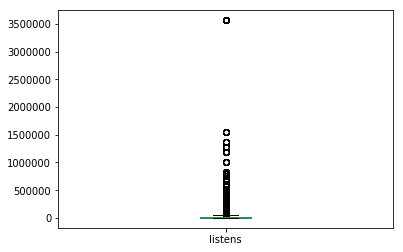

In [49]:
unique_albums = tracks.album.drop_duplicates()
tracks.album.listens.plot.box();

Wykres jest nieczytelny z powodu obserwacji odstających. Usuwamy więc obserwacje >0.95 kwartyla w celu podniesienia czytelności wykresu:

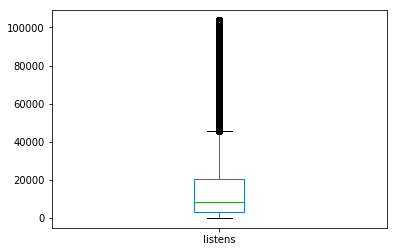

In [50]:
album_listens = tracks.album['listens'][tracks.album['listens']<tracks.album['listens'].quantile(0.95)]
album_listens.plot.box();

Porównajmy ten wykres z prezentowanym wyżej wykresem odsłuchań poszczególnych utworów:

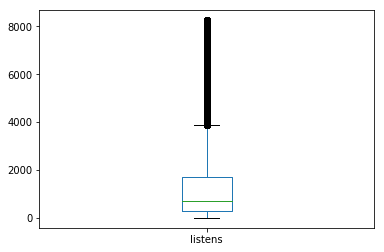

In [51]:
tracks_listens_cleared['listens'].plot.box();

Łatwo zauważyć, że wykresy te są bardzo podobne do siebie. Ilość odsłuchań pojedynczego utworu jest ok. 10 razy mniejsza niż albumu. Możemy zatem wnioskować, iż ilość odsłuchań albumów to ilość odsłuchań jakiegokolwiek należącego do nich utworu. Jeśli zatem album średnio ma około 10 utworów, to ilość odsłuchań albumu jest średnio 10 razy większa od średniej ilości odsłuchań utworu. Spójrzmy jeszcze na te same dane w postaci histogramów, które oczywiście również wyglądają bardzo podobnie:

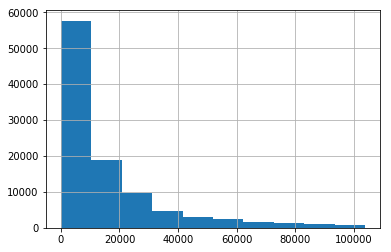

In [52]:
album_listens.hist();

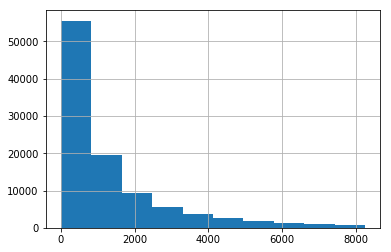

In [53]:
tracks_listens_cleared['listens'].hist();

# Eksploracja danych o artystach - autorach utworów z bazy

Miejsca, z których pochodzi najwięcej autorów utworów. W celu uzyskania tych informacji najpierw usuwamy duplikaty artystów. 

In [54]:
unique_artists = tracks.artist.drop_duplicates()

In [55]:
unique_artists.location.value_counts().head(10)

Brooklyn, NY         294
France               123
New York, NY          95
Portland, OR          74
Italy                 69
Los Angeles, CA       64
San Francisco, CA     58
Chicago, IL           57
Russia                57
Philadelphia, PA      52
Name: location, dtype: int64

Dostrzegalna jest wyraźna przewaga miast amerykańskich, zaś z Brooklyna pochodzi prawie 3 razy więcej artystów niż z następnej w kolejności Francji. 

Artyści o największej ilości utworów w bazie:

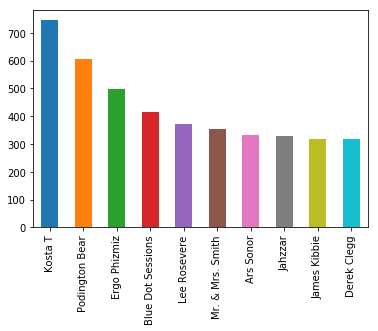

In [56]:
tracks.artist.name.value_counts().head(10).plot.bar();

Histogram przedstawiający rozkład czasu rozpoczęcia aktywności artystycznej przez autorów utworów. Oczywistym wnioskiem jest fakt, że najwięcej artystów z bazy rozpoczęło aktywność w ostatnim 20-leciu. 

In [57]:
unique_artists['active_year_begin'] = pd.DatetimeIndex(unique_artists['active_year_begin']).year

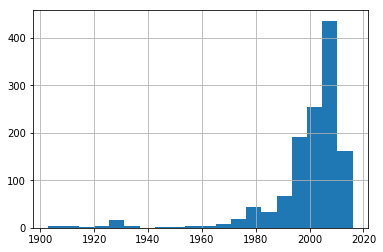

In [58]:
unique_artists['active_year_begin'].hist(bins=20);

# Eksploracja danych o utworach

Język tesktów utworów. Oczywiście nieporównywalnie więcej utworów anglojęzycznych od pozostałych. Wynika to zarówno z powodu zdominowania bazy utworami amerykańskimi, jak i faktu, że artyści na całym świecie tworzą teksty w języku angielskim, aby mieć możliwość wejścia na scenę międzynarodową.

In [59]:
tracks.track.language_code.value_counts().head(15)

en    14255
es      204
fr      191
pt       81
de       68
ru       30
it       28
tr       25
sr       23
pl       12
ar       12
he       12
ee        7
el        7
bg        7
Name: language_code, dtype: int64

Wizualizacja ilości utworów w poszczególnych językach (z wyłączeniem angielskiego):

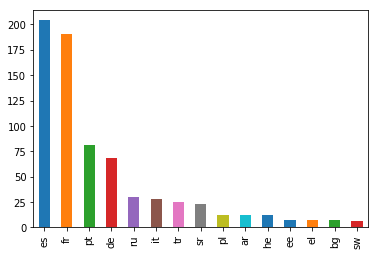

In [60]:
tracks.track.language_code[tracks.track.language_code !='en'].value_counts().head(15).plot.bar();

Histogram czasu trwania utworów - najwięcej utworów trwających ok. 3-4min (ok.200s):

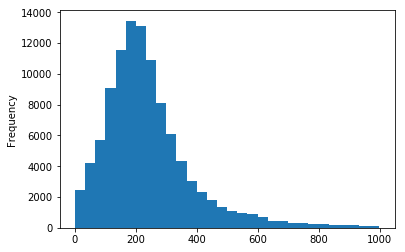

In [61]:
tracks.track.duration[tracks.track.duration<1000].plot(kind='hist', bins=30);

Usunięcie obserwacji odstających i wizualizacja czasu trwania utworów na wykresie pudełkowym. Ponad połowa obserwacji pomiędzy 100 a 300s.

In [62]:
tracks_duration_cleared = tracks.track[tracks.track.duration < tracks.track.duration.quantile(0.95)]

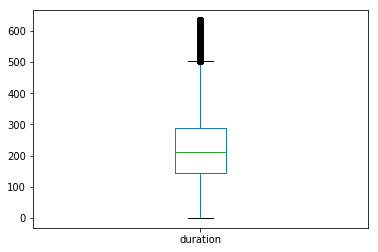

In [63]:
tracks_duration_cleared.duration.plot.box();

In [64]:
tracks['year_released'] = pd.DatetimeIndex(tracks.album['date_released']).year

Ilość odsłuchań albumu w zależności od roku powstania:

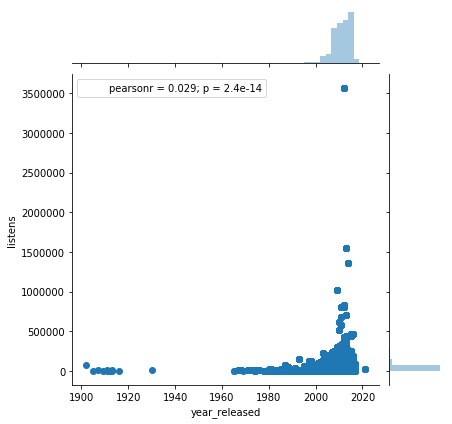

In [65]:
sns.jointplot(x = tracks['year_released'] , y = tracks.album.listens);

In [66]:
tracks.album.sort_values('listens', ascending= False).head()

comments         date_created        date_released engineer  favorites  \
52198      53.0  2012-12-06 16:45:52  2012-12-12 00:00:00      NaN       11.0   
51906      53.0  2012-12-06 16:45:52  2012-12-12 00:00:00      NaN       11.0   
52090      53.0  2012-12-06 16:45:52  2012-12-12 00:00:00      NaN       11.0   
52089      53.0  2012-12-06 16:45:52  2012-12-12 00:00:00      NaN       11.0   
52088      53.0  2012-12-06 16:45:52  2012-12-12 00:00:00      NaN       11.0   

            id                                        information    listens  \
52198  13010.0  <p><a href="http://wfmu.org/" target="_blank">...  3564243.0   
51906  13010.0  <p><a href="http://wfmu.org/" target="_blank">...  3564243.0   
52090  13010.0  <p><a href="http://wfmu.org/" target="_blank">...  3564243.0   
52089  13010.0  <p><a href="http://wfmu.org/" target="_blank">...  3564243.0   
52088  13010.0  <p><a href="http://wfmu.org/" target="_blank">...  3564243.0   

      producer                                               tags    title  \
52198      NaN  ['music is a belief', 'chary', 'nishad', 'uju'...  Entries   
51906      NaN  ['music is a belief', 'chary', 'nishad', 'uju'...  Entries   
52090      NaN  ['music is a belief', 'chary', 'nishad', 'uju'...  Entries   
52089      NaN  ['music is a belief', 'chary', 'nishad', 'uju'...  Entries   
52088      NaN  ['music is a belief', 'chary', 'nishad', 'uju'...  Entries   

       tracks   type  
52198   200.0  Album  
51906   200.0  Album  
52090   200.0  Album  
52089   200.0  Album  
52088   200.0  Album

Obserwacją bardzo silnie odstającą od reszty (wyraźnie wysunięty do góry punkt na wykresie powyżej) jest album "Entries"

Usuwamy ze zbioru obserwacje odstające w celu polepszenia wizualizacji:

In [67]:
listens_cleared = tracks[tracks.album.listens<tracks.album.listens.quantile(0.95)]

Powtarzamy wykres dla pomniejszonego zbioru:

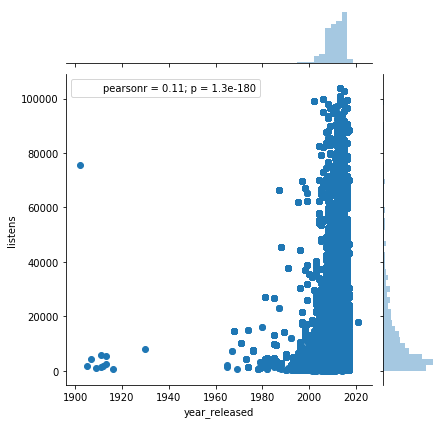

In [68]:
sns.jointplot(x = listens_cleared['year_released'] , y = listens_cleared.album.listens);

Jeszcze bardziej ograniczamy zakres danych, tym razem usuwając 0.01 kwantyl roku:

In [69]:
listens_cleared = listens_cleared[listens_cleared.year_released>listens_cleared.year_released.quantile(0.01)]

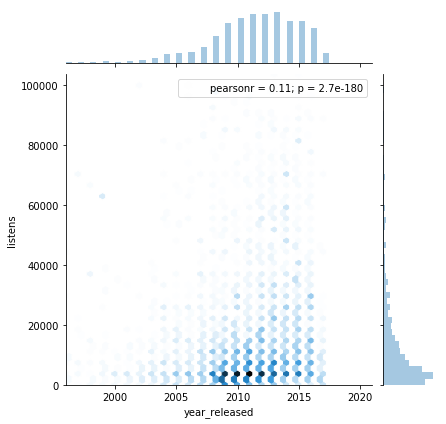

In [70]:
sns.jointplot(x = listens_cleared['year_released'] , y = listens_cleared.album.listens, kind='hex');

Dostrzegalna jest lekka tendencja do zwiększającej się ilości odsłuchań wraz ze wzrastaniem daty powstania albumu.

# Korelacje, tabele kontyngencji

Tabela kontyngecji dla albumów:

In [71]:
tracks.album.corr() 

comments  favorites        id   listens    tracks
comments   1.000000   0.354861  0.008538  0.817900  0.338183
favorites  0.354861   1.000000 -0.043773  0.435308  0.165012
id         0.008538  -0.043773  1.000000  0.040166  0.090991
listens    0.817900   0.435308  0.040166  1.000000  0.246190
tracks     0.338183   0.165012  0.090991  0.246190  1.000000

Dostrzegalna korelacja pozytywna między favorites (ocena/polubienia) i listens (ilość odsłuchań) oraz między comments (komentarze) i tracks (utwory) -ok.0.5-duża. 

Tabela kontyngencji dla całości danych (albumów, artystów i utworów). Dostrzegalne silne korelacje pozytywne między parametrami 'comments', 'favorites', 'listens' - zarówno w albumach, jak i artystach i utworach. Ponadto, występuje również korelacja pozytywna między rokiem wydania a bit rate'm (ok. 0.3).

In [72]:
tracks.corr() 

album                                          \
                         comments favorites        id   listens    tracks   
album         comments   1.000000  0.354861  0.008538  0.817900  0.338183   
              favorites  0.354861  1.000000 -0.043773  0.435308  0.165012   
              id         0.008538 -0.043773  1.000000  0.040166  0.090991   
              listens    0.817900  0.435308  0.040166  1.000000  0.246190   
              tracks     0.338183  0.165012  0.090991  0.246190  1.000000   
artist        comments   0.103575  0.451939  0.031179  0.207684 -0.016273   
              favorites  0.083074  0.421269  0.076417  0.204736 -0.012087   
              id         0.011472 -0.034206  0.768438  0.039602  0.068765   
              latitude   0.025466  0.020981  0.067412  0.001950  0.054672   
              longitude -0.007483 -0.037172  0.122350 -0.043715  0.005379   
track         bit_rate  -0.009305  0.022761  0.276548 -0.020398  0.038798   
              comments   0.139341  0.163516 -0.016401  0.165222  0.000777   
              duration  -0.037953 -0.064757  0.009395 -0.063890 -0.056935   
              favorites  0.123491  0.471746 -0.015705  0.210613 -0.029768   
              interest   0.140355  0.306329  0.003946  0.231219 -0.008293   
              listens    0.191619  0.425557  0.041053  0.325086 -0.016939   
              number     0.081848  0.066328  0.094970  0.033802  0.554440   
year_released            0.025165 -0.016981  0.580225  0.028770  0.063289   

                           artist                                          \
                         comments favorites        id  latitude longitude   
album         comments   0.103575  0.083074  0.011472  0.025466 -0.007483   
              favorites  0.451939  0.421269 -0.034206  0.020981 -0.037172   
              id         0.031179  0.076417  0.768438  0.067412  0.122350   
              listens    0.207684  0.204736  0.039602  0.001950 -0.043715   
              tracks    -0.016273 -0.012087  0.068765  0.054672  0.005379   
artist        comments   1.000000  0.897151 -0.091835  0.049910 -0.080804   
              favorites  0.897151  1.000000 -0.075421  0.057647 -0.110325   
              id        -0.091835 -0.075421  1.000000 -0.037889  0.219426   
              latitude   0.049910  0.057647 -0.037889  1.000000 -0.196519   
              longitude -0.080804 -0.110325  0.219426 -0.196519  1.000000   
track         bit_rate   0.065088  0.069958  0.236413  0.072798  0.114819   
              comments   0.103271  0.080032 -0.002449  0.000750 -0.010259   
              duration  -0.041211 -0.051636  0.012368  0.009824  0.031178   
              favorites  0.341813  0.314240 -0.007465 -0.003625 -0.017006   
              interest   0.226661  0.207262  0.005277 -0.005412 -0.011296   
              listens    0.330230  0.310406  0.034098 -0.009335 -0.014418   
              number    -0.042738 -0.046372  0.073508  0.039091  0.027742   
year_released            0.042926  0.064347  0.486144  0.079891  0.090724   

                            track                                          \
                         bit_rate  comments  duration favorites  interest   
album         comments  -0.009305  0.139341 -0.037953  0.123491  0.140355   
              favorites  0.022761  0.163516 -0.064757  0.471746  0.306329   
              id         0.276548 -0.016401  0.009395 -0.015705  0.003946   
              listens   -0.020398  0.165222 -0.063890  0.210613  0.231219   
              tracks     0.038798  0.000777 -0.056935 -0.029768 -0.008293   
artist        comments   0.065088  0.103271 -0.041211  0.341813  0.226661   
              favorites  0.069958  0.080032 -0.051636  0.314240  0.207262   
              id         0.236413 -0.002449  0.012368 -0.007465  0.005277   
              latitude   0.072798  0.000750  0.009824 -0.003625 -0.005412   
              longitude  0.114819 -0.010259  0.031178 -0.017006 -0.011296   
track         bit_rate

Wizualizacja zależności roku wydania od bit rate'u. Widoczny jest lekki wzrost bit rate'u wraz z rokiem wydania (rozwój technologiczny):

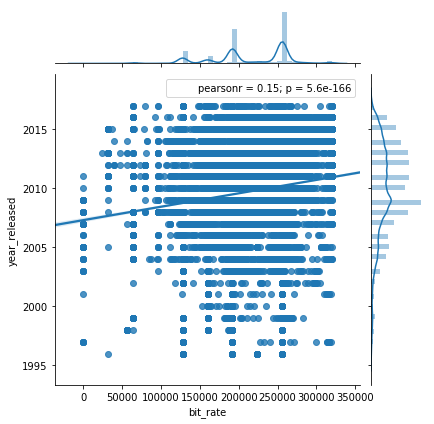

In [73]:
sns.jointplot(x = tracks.track.bit_rate[tracks.track.bit_rate<tracks.track.bit_rate.quantile(0.99)], 
              y = tracks.year_released[tracks.year_released>tracks.year_released.quantile(0.01)], kind='reg');

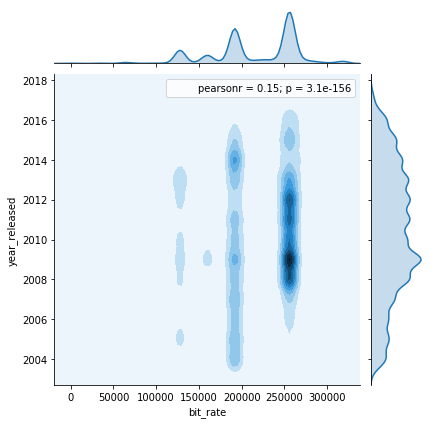

In [74]:
sns.jointplot(x = tracks.track.bit_rate[tracks.track.bit_rate<tracks.track.bit_rate.quantile(0.99)], 
              y = tracks.year_released[tracks.year_released>tracks.year_released.quantile(0.05)], kind='kde');

Szczegółowe informacje o zbiorze przy użyciu pandas_profiling:

In [75]:
pandas_profiling.ProfileReport(tracks)

# Gatunki muzyczne

Wizualizacja ilości utworów w poszczególnych gatunkach. Najwięcej obserwacji z muzyki rockowej, eksperymantalnej i elektronicznej. Najmniej bluesa i "easy listening":

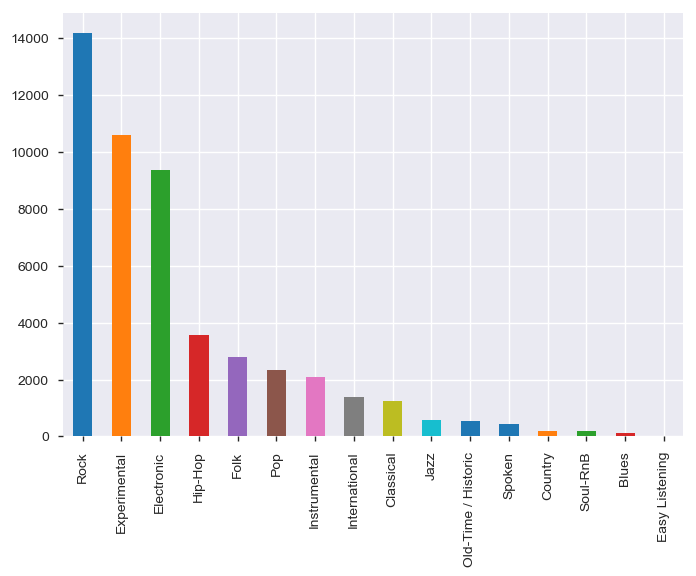

In [76]:
tracks.track['genre_top'].value_counts().plot.bar();

Wybór 10 najbardziej popularnych gatunków. Wizualizacja zainteresowania (interest) w zależności od gatunku w postaci wykresów pudełkowych, po wcześniejszym usunięciu obserwacji odstających.

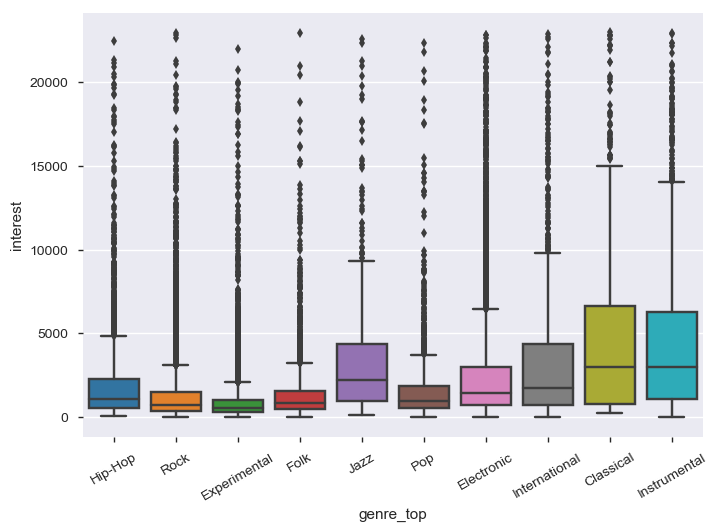

In [77]:
top_genres = tracks.track['genre_top'].value_counts().head(10)
top_genres_tracks=tracks.track[tracks.track.genre_top.isin(top_genres.keys())]
top_genres_tracks_interest=top_genres_tracks[top_genres_tracks.interest<top_genres_tracks.interest.quantile(0.99)]
chart = sns.boxplot( x = "genre_top", y="interest", data = top_genres_tracks_interest) 
chart.set_xticklabels(chart.get_xticklabels(),rotation=30)
chart;

Największe zróżnicowanie zainteresowania w muzyce klasycznej, instrumentalnej, jazzowej i międzynarodowej.

Wizualizacja roku powstania utworów w zależności od gatunku w postaci wykresów pudełkowych, po wcześniejszym usunięciu obserwacji odstających.

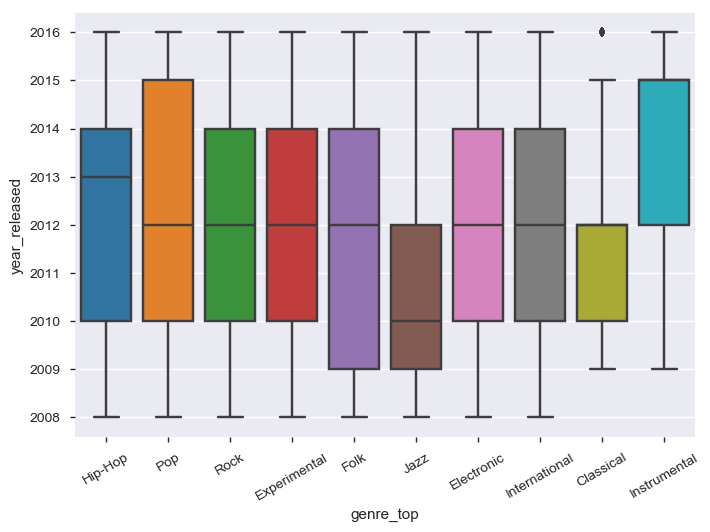

In [78]:
top_genres_tracks['year_released'] = pd.DatetimeIndex(top_genres_tracks['date_created']).year
top_genres_tracks_year=top_genres_tracks[top_genres_tracks.year_released<top_genres_tracks.year_released.quantile(0.99)]
chart = sns.boxplot( x = "genre_top", y="year_released", data = top_genres_tracks_year) 
chart.set_xticklabels(chart.get_xticklabels(),rotation=30)
chart;

Większość obserwacji pochodzi z 2010-2014 roku, co najprawdopodobniej nie ma żadnego związku z gatunkami.

Wybór 5 najbardziej popularnych gatunków. Wizualizacja czasu trwania w zależności od gatunku w postaci wykresów skrzypcowych, po wcześniejszym usunięciu obserwacji odstających.

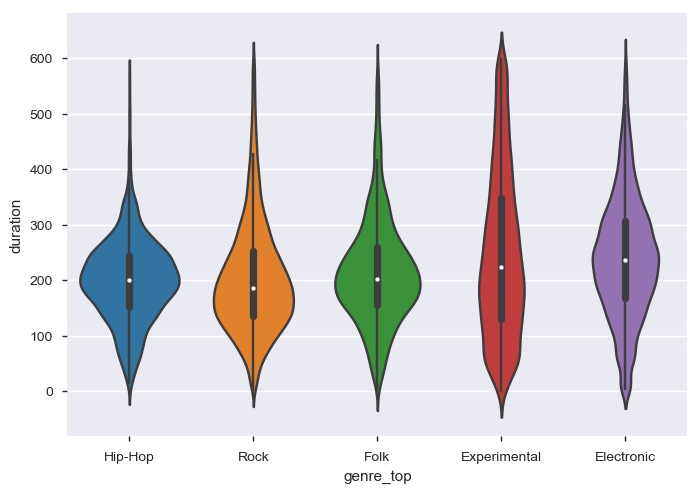

In [79]:
top_genres = tracks.track['genre_top'].value_counts().head(5)
top_genres_tracks=tracks.track[tracks.track.genre_top.isin(top_genres.keys())]
top_genres_tracks_duration=top_genres_tracks[top_genres_tracks.duration<top_genres_tracks.duration.quantile(0.95)]
sns.violinplot( x = "genre_top", y="duration", data = top_genres_tracks_duration);


Wyraźnie dostrzegalny jest bardziej spłaszczony, równomierny rozkład długości trwania utworów w muzyce eksperymentalnej oraz - następnej w kolejności - elektronicznej. Powodem jest najprawdopodobniej fakt, iż gatunki te są z definicji bardzo "szerokie", tj. nie definiują bezpośrednio konkretnej formy (zwłaszcza muzyka eksperymentalna). Czas trwania może się więc bardzo mocno różnić w poszczególnych utworach. 

# Subiektywne cechy muzyczne

In [80]:
pandas_profiling.ProfileReport(echonest)

In [81]:
echonest=echonest.drop(['temporal_features'], axis=1)

In [82]:

echonest.head()

audio_features                                                    \
  track_id   acousticness danceability    energy instrumentalness  liveness   
1        2       0.416675     0.675894  0.634476         0.010628  0.177647   
2        3       0.374408     0.528643  0.817461         0.001851  0.105880   
3        5       0.043567     0.745566  0.701470         0.000697  0.373143   
4       10       0.951670     0.658179  0.924525         0.965427  0.115474   
5      134       0.452217     0.513238  0.560410         0.019443  0.096567   

                                    metadata                     \
  speechiness    tempo   valence  album_date         album_name   
1    0.159310  165.922  0.576661         NaN                NaN   
2    0.461818  126.957  0.269240         NaN                NaN   
3    0.124595  100.260  0.621661         NaN                NaN   
4    0.032985  111.562  0.963590  2008-03-11  Constant Hitmaker   
5    0.525519  114.290  0.894072         NaN                NaN   

                                                                      \
  artist_latitude       artist_location artist_longitude artist_name   
1         32.6783           Georgia, US         -83.2230        AWOL   
2         32.6783           Georgia, US         -83.2230        AWOL   
3         32.6783           Georgia, US         -83.2230        AWOL   
4         39.9523  Philadelphia, PA, US         -75.1624   Kurt Vile   
5         32.6783           Georgia, US         -83.2230        AWOL   

                                        ranks                          \
                release artist_discovery_rank artist_familiarity_rank   
1  AWOL - A Way Of Life                   NaN                     NaN   
2  AWOL - A Way Of Life                   NaN                     NaN   
3  AWOL - A Way Of Life                   NaN                     NaN   
4     Constant Hitmaker                2635.0                  2544.0   
5  AWOL - A Way Of Life                   NaN                     NaN   

                                                                  \
  artist_hotttnesss_rank song_currency_rank song_hotttnesss_rank   
1                    NaN                NaN                  NaN   
2                    NaN                NaN                  NaN   
3                    NaN                NaN                  NaN   
4                  397.0           115691.0              67609.0   
5                    NaN                NaN                  NaN   

   social_features                                                     \
  artist_discovery artist_familiarity artist_hotttnesss song_currency   
1         0.388990           0.386740          0.406370      0.000000   
2         0.388990           0.386740          0.406370      0.000000   
3         0.388990           0.386740          0.406370      0.000000   
4         0.557339           0.614272          0.798387      0.005158   
5         0.388990           0.386740          0.406370      0.000000   

                   
  song_hotttnesss  
1        0.000000  
2        0.000000  
3        0.000000  
4        0.354516  
5        0.000000

Tabela kontyngencji:

In [83]:
echonest.audio_features.corr()

acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.189599 -0.477273          0.110033   
danceability         -0.189599      1.000000  0.045345         -0.118033   
energy               -0.477273      0.045345  1.000000         -0.002412   
instrumentalness      0.110033     -0.118033 -0.002412          1.000000   
liveness              0.041319     -0.143339  0.045752         -0.058593   
speechiness           0.038785      0.171311 -0.008645         -0.216689   
tempo                -0.110701     -0.094352  0.227324          0.023003   
valence              -0.085436      0.428515  0.219384         -0.145200   

                  liveness  speechiness     tempo   valence  
acousticness      0.041319     0.038785 -0.110701 -0.085436  
danceability     -0.143339     0.171311 -0.094352  0.428515  
energy            0.045752    -0.008645  0.227324  0.219384  
instrumentalness -0.058593    -0.216689  0.023003 -0.145200  
liveness          1.000000     0.073104 -0.007566 -0.017886  
speechiness       0.073104     1.000000  0.032188  0.094794  
tempo            -0.007566     0.032188  1.000000  0.129911  
valence          -0.017886     0.094794  0.129911  1.000000

Jedną z wykrytych zależności jest korelacja ujemna między energy (energia) a acousticness (akustyczność): -0.48. Wizualizacja tych danych poniżej:

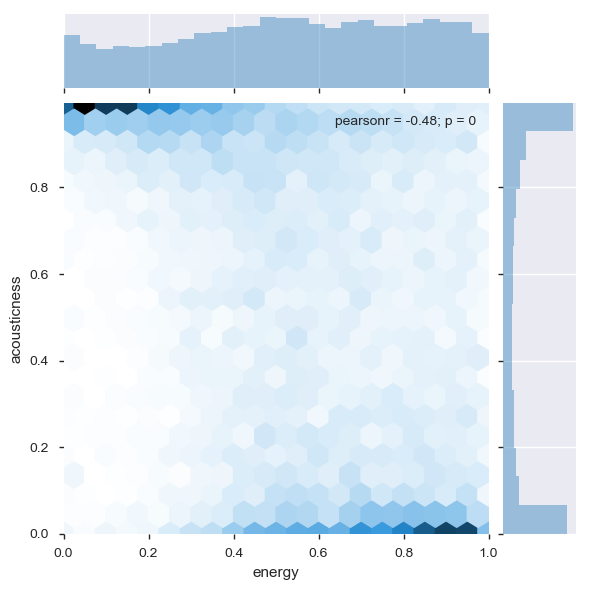

In [84]:
sns.jointplot(x = echonest.audio_features.energy, y = echonest.audio_features.acousticness, kind='hex');

Na powyższym wykresie widać wyraźnie, że najwięcej utworów znajduje się w rogach, czyli utwory akustyczne są bardzo mało energiczne i na odwrót. Pokrywa się to z zakładanym charakterem muzyki akustycznej, która zwykle jest dość spokojna, relaksująca i z pewnością nieenergiczna. Utwory bardzo energiczne to natomiast często muzyka elektroniczna, czyli odwrotna do akustycznej.